# Customer churn analytics using classification models

This tutorial goes through analyzing a customer dataset with several classification models: 
- Logistic Regression
- Support Vector Machine (SVM)
- Decision Trees
- Maximum Likelihood Classifier (MLC)
- A Neural Network Classification 


Dataset is taken from Kaggle: 

https://www.kaggle.com/shrutimechlearn/churn-modelling#Churn_Modelling.csv

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

RowNumberRow Numbers from 1 to 10000
- CustomerId: Unique Ids for bank customer identification
- Surname: Customer's last name
- CreditScore: Credit score of the customer
- Geography: The country from which the customer belongs
- Gender: Male or Female
- Age: Age of the customer
- Tenure: Number of years for which the customer has been with the bank
- Balance: Bank balance of the customer
- NumOfProducts: Number of bank products the customer is utilising
- HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not
- IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not
- EstimatedSalary: Estimated salary of the customer in Dollars
- Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained


## Explorative Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import math


In [2]:
df = pd.read_csv('data/Churn_Modelling.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# total number of customers
total_customers=len(df.index)
print(total_customers)

10000


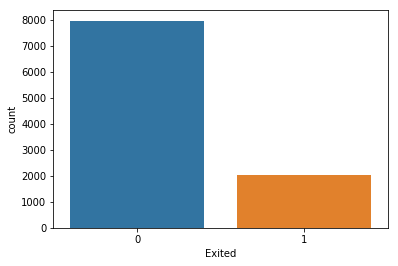

In [7]:
# create charts to check the relationships between variables 
# (correlation, distribution, etc.)

# 1st plot - between customers that churned and that did not churn
sns.countplot(x = "Exited", data = df)

In [8]:
# percentage of churned customers
customers_churned = df.groupby('Exited').Exited.count()[1]
perc_cust_churned = customers_churned/total_customers
print(perc_cust_churned)

0.2037


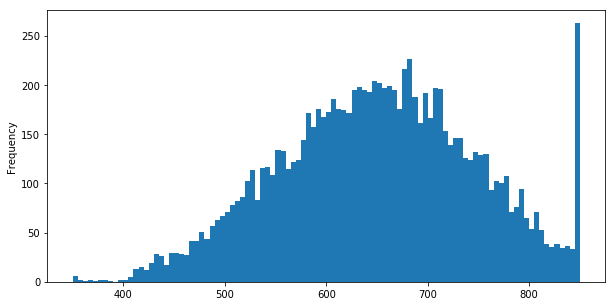

In [9]:
# compare the credit scores for churned
df['CreditScore'].plot.hist(bins=100, figsize=(10,5))

In [10]:
## plot the credit scores for churned

In [11]:
## plot the credit scores for non-churned 

In [12]:
# compare the geography for churned
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

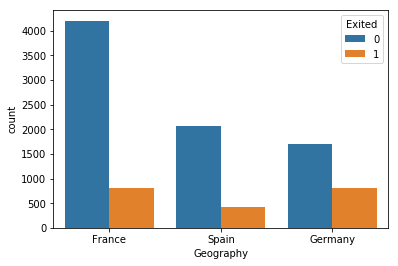

In [13]:
sns.countplot(x='Geography',hue='Exited', data=df)

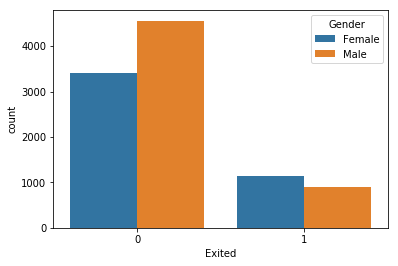

In [14]:
# compare the gender for churned
sns.countplot(x = "Exited", hue = "Gender", data = df)

In [15]:
# percentage of churned customers by gender
churned_by_gender = df.groupby(['Gender'])['Exited'].sum()
print(churned_by_gender)

Gender
Female    1139
Male       898
Name: Exited, dtype: int64


In [16]:
churned_males = churned_by_gender['Male']
churned_females = churned_by_gender['Female']
print('Churned males: ' + str(churned_males))
print('Churned females: ' + str (churned_females))
#df.groupby('Exited').Exited.count()[1]
#perc_cust_churned = customers_churned/total_customers
#print(perc_cust_churned)

Churned males: 898
Churned females: 1139


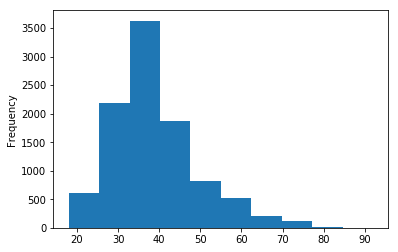

In [17]:
# compare the age for churned
df['Age'].plot.hist()

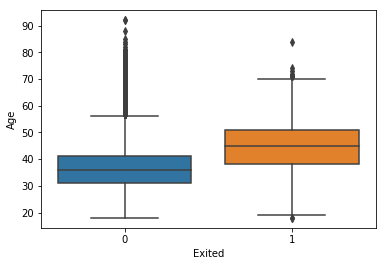

In [18]:
sns.boxplot(x="Exited", y="Age", data=df)

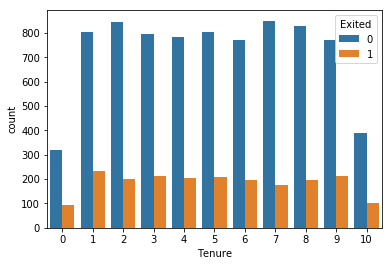

In [19]:
# compare the tenure for churned
sns.countplot(x='Tenure',hue='Exited', data=df)
#df['Tenure'].plot.hist()

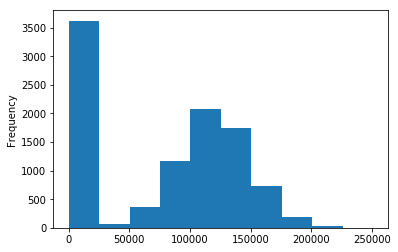

In [20]:
# compare the balance for churned
df['Balance'].plot.hist()

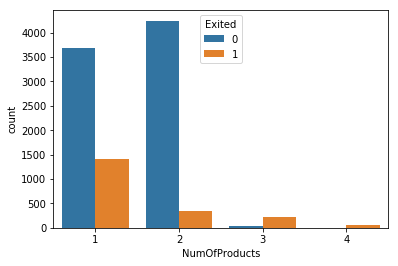

In [21]:
# compare the number of products
sns.countplot(x='NumOfProducts',hue='Exited', data=df)
#df['NumOfProducts'].plot.hist()

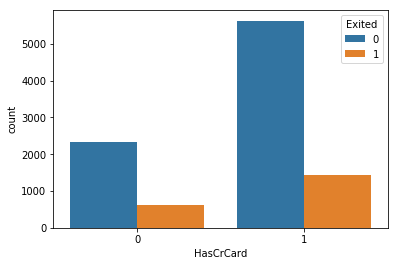

In [22]:
# compare whether they have credit cards or not
sns.countplot(x = "HasCrCard", hue = "Exited", data = df)

In [23]:
churned_by_cc = df.groupby(['HasCrCard'])['Exited'].sum()
print(churned_by_cc)

HasCrCard
0     613
1    1424
Name: Exited, dtype: int64


In [24]:
churned_no_cc = churned_by_cc[0]
churned_cc = churned_by_cc[1]
print('Churned with credit card: ' + str(churned_no_cc))
print('Churned with no credit card: ' + str (churned_cc))

Churned with credit card: 613
Churned with no credit card: 1424


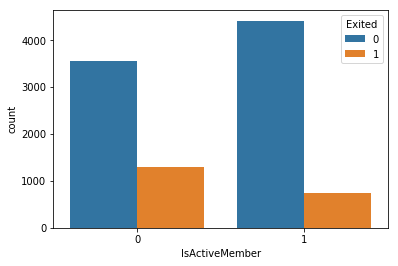

In [25]:
# compare how active were churned customers
sns.countplot(x = 'IsActiveMember', hue = "Exited", data = df)

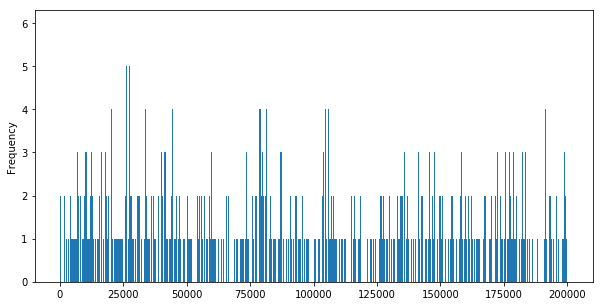

In [26]:
# compare estimated salary for churned
df['EstimatedSalary'].plot.hist(bins=10000, figsize=(10,5))

## Data Wrangling

In [27]:
# check if there are null values anywhere
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
# drop unnecessary columns
df.drop("Surname", axis=1, inplace=True)
df.drop("CustomerId", axis=1, inplace=True)
df.drop("RowNumber", axis=1, inplace=True)

In [30]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [31]:
# convert all string variables into dummies 
## convert Gender into dummy values
pd.get_dummies(df['Gender']).head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [32]:
## drop one of the columns, since Gender is a binary value, and if one is 0, 
## then the other is 1 anyway. Let's drop the 1
gender = pd.get_dummies(df['Gender'], drop_first=True)
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [33]:
### same for geography. Here we have 3 values, so we will drop the first column,
### because if the other two are 0s, the first one is 1
pd.get_dummies(df['Geography']).head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [34]:
geography = pd.get_dummies(df['Geography'], drop_first=True)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [35]:
### same for the number of products
pd.get_dummies(df['NumOfProducts']).head()


,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0


In [36]:
num_of_prods = pd.get_dummies(df['NumOfProducts'], drop_first=True)
num_of_prods.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,1,0
3,1,0,0
4,0,0,0


In [37]:
# put the other categorical vairables with high scale
# like CreditScore, Age, Balance, EstimatedSalary into range buckets

In [38]:
# concatenate all columns
df_concactenated = pd.concat([df, gender, geography, num_of_prods], axis=1)

In [39]:
df_concactenated.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain,2,3,4
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0,0,0


In [40]:
# drop columns Gender, Geography, NumOfProducts
df_concactenated.drop(['Geography','Gender','NumOfProducts'], axis=1, inplace=True)

In [41]:
df_concactenated.head(2)

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain,2,3,4
0,619,42,2,0.00,1,1,101348.88,1,0,0,0,0,0,0
1,608,41,1,83807.86,0,1,112542.58,0,0,0,1,0,0,0


## Split the data into testing and training

In [42]:
# define dependent and independent variables
X = df_concactenated.drop("Exited", axis=1)
Y = df_concactenated['Exited']

In [43]:
# split the data into training and testing
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Build a Logistic Regression model

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg_model = LogisticRegression()

In [47]:
logreg_model.fit(X_train, Y_train)

C:\Users\fbagi\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
# make a prediction using Logistic Regression
logreg_prediction = logreg_model.predict(X_test)
len(logreg_prediction)

3000

In [ ]:
# Evaluate how the model has been performing
## Cross validation
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test, logreg_prediction)

array([[2337,   36],
       [ 604,   23]], dtype=int64)

####                   Confusion Matrix
                PredictedNegative PredictedPositive
ActualNegative

ActualPositive

(2337+23)/(604+36)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, logreg_prediction)

0.7866666666666666

# Build a Support Vector Machine (SVM) model

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svm_model = SVC(kernel = "linear")

In [ ]:
# train the model
svm_model.fit(X_train, Y_train)

In [ ]:
# predict the response
svm_prediction = svm_model.predict(X_test)
print("accuracy: ", metrics.accuracy_score(Y_test, Y_pred = svm_prediction))

In [ ]:
# precision score
print("precision: ", metrics.precision_score(Y_test, Y_pred = svm_prediction))

In [ ]:
# recall score
print("recall", metrics.recall_score(Y_test, Y_pred = svm_prediction))
print(metrics.classification_report(Y_test, Y_pred = svm_prediction))